# Try out Keras

General info on the [Keras website](https://keras.io/getting_started/intro_to_keras_for_engineers/)
First following [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) tutorial

## More info
* Stanford ML course [videos](https://www.youtube.com/watch?v=qeHZOdmJvFU&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=1)

## Imports

In [163]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import np_utils
from matplotlib import pyplot as plt

## Data

(60000, 1, 28, 28)
(10000, 28, 28, 1)
(60000, 28, 28, 1)


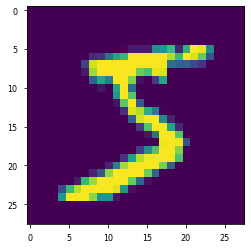

In [215]:
from tensorflow.keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0]) #can not call after manipulations
#image has depth "1"
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#set pixel data to float [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_test.shape)
 # see https://stackoverflow.com/questions/60556250/i-dont-understand-what-is-wrong-invalidargumenterror-conv2dcustombackpropinputo
X_train.shape = (60000,28,28,1)
X_test.shape = (10000,28,28,1)
print(X_train.shape)

In [173]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print(Y_train.shape)

(60000, 10)


## ML model

In [201]:
model = Sequential()

In [202]:
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape)

(None, 26, 26, 32)


In [204]:
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [205]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [206]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train

In [207]:
model.fit(X_train, Y_train,  batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4529 - accuracy: 0.8531
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0860 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0669 - accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0551 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0438 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0409 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0361 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] - 72s 38m

In [218]:
score = model.evaluate(X_test, Y_test, verbose=2)


313/313 - 2s - loss: 0.0178 - accuracy: 0.9944


In [217]:
print(score)

[0.017792459577322006, 0.9944000244140625]
